# Interaction with the World Homework (#3)
Python Computing for Data Science (c) J Bloom, UC Berkeley 2018

Due Tuesday 2pm, Feb 20, 2018

# 1) Monty: The Python Siri

Let's make a Siri-like program (call it Monty!) with the following properties:
   - record your voice command
   - use a webservice to parse that sound file into text
   - based on what the text, take three different types of actions:
       - send an email to yourself
       - do some math
       - tell a joke

So for example, if you say "Monty: email me with subject hello and body goodbye", it will email you with the appropriate subject and body. If you say "Monty: tell me a joke" then it will go to the web and find a joke and print it for you. If you say, "Monty: calculate two times three" it should response with printing the number 6.

Hint: you can use speed-to-text apps like Houndify (or, e.g., Google Speech https://cloud.google.com/speech/) to return the text (but not do the actions). You'll need to sign up for a free API and then follow documentation instructions for using the service within Python. 

In [220]:
#Record Audio
import pyaudio
chunk = 1024
FORMAT = pyaudio.paInt32
CHANNELS = 1
RATE = 8000
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "hw_voice.wav"
p = pyaudio.PyAudio()
stream = p.open(format = FORMAT,
    channels = CHANNELS,
    rate = RATE,
    input = True,
    frames_per_buffer = chunk)
all = []
for i in range(0, int(RATE / chunk * RECORD_SECONDS)):
    data = stream.read(chunk)
    all.append(data)
print("* done recording")
stream.close()
p.terminate()

* done recording


In [221]:
#Generate the .wav file for recording
import wave
data = b"".join(all)
wf = wave.open(WAVE_OUTPUT_FILENAME, "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(data)
wf.close()

In [222]:
#convert to 16 bit .wav file to run on Houndify
audio = wave.open('hw_voice.wav')
import soundfile

data, samplerate = soundfile.read('hw_voice.wav')
soundfile.write('new.wav', data, samplerate, subtype='PCM_16')

In [223]:
#send generated audio file to houndify
import houndify

clientId = "KMRiKZtXeXONeWV6V5vFpQ=="
clientKey = "81Tun8idzWqKerzca73ztFbgZ_88kENvOiweyb3nZeFDdEO3Sc0NvnlxkF-xs1JVz8Lewlwz_eCaEsPx3gAflg=="
userId = "test_user"
client = houndify.StreamingHoundClient(clientId, clientKey, userId, sampleRate=8000)
client = houndify.TextHoundClient(clientId, clientKey, userId)
CLIENT_ID = 'KMRiKZtXeXONeWV6V5vFpQ=='
CLIENT_KEY = '81Tun8idzWqKerzca73ztFbgZ_88kENvOiweyb3nZeFDdEO3Sc0NvnlxkF-xs1JVz8Lewlwz_eCaEsPx3gAflg=='


result = ! ./sample_wave.py 'KMRiKZtXeXONeWV6V5vFpQ==' '81Tun8idzWqKerzca73ztFbgZ_88kENvOiweyb3nZeFDdEO3Sc0NvnlxkF-xs1JVz8Lewlwz_eCaEsPx3gAflg==' new.wav
command = result[len(result)-2] #extract the finished command assembled by houndify
words = command.split() #parse sentence into a list obj. of words, will use later


In [225]:
# check what the command is and print out Monty's reply below this cell
if 'email' in command:
    %run -i 'email_code.py'
if 'joke' in command:
    %run -i 'jokes.py'
else:
    %run -i 'maths.py'
    
    #Monty's replu will be here: 

 Did you hear about the vampire bicycle that went round biting people's arms off? A: It was a vicious cycle. 


In [36]:
#Code for 'email_code.py'
import smtplib #initialize email
# sign into gmail
gmail_user = 'cschurman125@gmail.com' #sorry, to grade this you're gonna have to use your own!  
gmail_password = 'marimbaluver'
# open smtp server
try:  
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.ehlo()
    server.starttls()
except:  
    print 'Something went wrong...'

# login to email
try:  
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    server.login(gmail_user, gmail_password)
except:  
    print 'Something went wrong...'

#construct email text
sent_from = gmail_user  
to = ['']  # fill in desired email here 

subject = words[words.index("subject")+1] #extracts the subject line, this method only works on single words following "subject
body = words[words.index("body")+1] #extracts the body word, this method only works on single words following "body"

email_text = """\  
From: %s  
To: %s  
Subject: %s

%s
""" % (sent_from, ", ".join(to), subject, body)

try:  
    server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    server.ehlo()
    server.login(gmail_user, gmail_password)
    server.sendmail(sent_from, to, email_text)
    server.close()

    print 'Email sent!'
except:  
    print 'Something went wrong...'


Email sent!


In [58]:
#code for jokes.py
Jokes = open('Jokes.txt') #open joke library
#next few lines format the .txt file from the interwebs to printable one liners
jokes = Jokes.readlines()[0] 
one_liners = jokes.split('Q:')
#select random joke and return it
from random import randint
randChoice = randint(0, len(one_liners)-1)
joke = one_liners[randChoice]
print(joke)

 What do you call a belt with a watch on it? A: A waist of time 


In [217]:
#code for maths.py
import requests
from bs4 import BeautifulSoup

from urllib import urlencode
words = command.split()
the_calculation = ' '.join(words[2:])
words = command.split()

#url_values = urlencode(query)
q = '+'.join(the_calculation.split())
url = 'https://www.google.com/search?q=' + q + '&ie=utf-8&oe=utf-8'
req = requests.get(url)
#print(req.text)
soup = BeautifulSoup(req.text, "lxml")
print(list(x.get_text() for x in soup.find_all("h2", class_="r")))

[u'(3 * 4) - 1 = 11']


# 2) Write a program that identifies musical notes from sound (AIFF) files. 

  - Run it on the supplied sound files (12) and report your program’s results. 
  - Use the labeled sounds (4) to make sure it works correctly. The provided sound files contain 1-3 simultaneous notes from different organs.
  - Save copies of any example plots to illustrate how your program works.
  
  https://piazza.com/berkeley/spring2018/ay250class13410/resources -> Homeworks -> hw3_sound_files.zip

Hints: You’ll want to decompose the sound into a frequency power spectrum. Use a Fast Fourier Transform. Be care about “unpacking” the string hexcode into python data structures. The sound files use 32 bit data. Play around with what happens when you convert the string data to other integer sizes, or signed vs unsigned integers. Also, beware of harmonics.

In [271]:
#import and extract
%matplotlib inline
import aifc
from scipy.fftpack import fft2
import numpy as np
import pyaudio
import wave
import matplotlib.pyplot as plt
from scipy import *

fname='12.aif'
# open file and extract needed params from the aif file
q = aifc.open(fname)
n = q.getnframes()
sampFreq = q.getframerate()
# convert the hexcode data to usable integer values
x = aifc.open(fname).readframes(n)
databytes=np.fromstring(x,np.short).byteswap()

# split the sterodata and reorganize channels
chn1=[]
chn2=[]
cnt1=0
cnt2=1
cnt3=2
cnt4=3
while cnt1 < len(databytes):
    chn1.append(databytes[cnt1])
    chn1.append(databytes[cnt2])
    chn2.append(databytes[cnt3])
    chn2.append(databytes[cnt4])
    cnt1+=4
    cnt2+=4
    cnt3+=4
    cnt4+=4


Text(0.5,1,u'Channel 2')

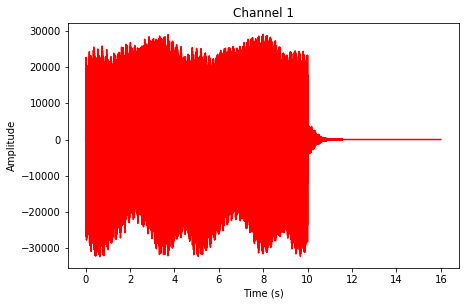

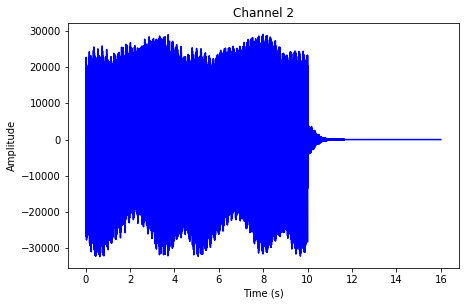

In [272]:
#Plot the Raw Sound File
time = arange(size(chn1)) / float(sampFreq)
fig = plt.figure(figsize=(7, 4.5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(time, chn1, color='r')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (s)')
ax1.set_title('Channel 1')

fig2 = plt.figure(figsize=(7, 4.5))
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(time, chn2, color='b')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time (s)')
ax2.set_title('Channel 2')


Text(0,0.5,u'Power (dB)')

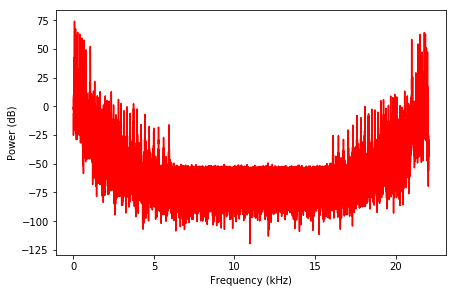

In [273]:
#Plot the Frequency Content
n = len(chn1) 
p = fft(chn1) # take the fourier transform 
p = p / float(n) # scale by the number of points so that
                 # the magnitude does not depend on the length 
                 # of the signal or on its sampling frequency  
p = p**2  # square it to get the power

nUniquePts = int(ceil((n+1)/2.0))
p = p[0:nUniquePts] #cuts in half  bc FFT is symmetric
p = abs(p) #removes imaginary portions


# multiply by two (see technical document for details)
# odd nfft excludes Nyquist point
if n % 2 > 0: # we've got odd number of points fft
    p[1:len(p)] = p[1:len(p)] * 2
else:
    p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / float(n))
fig = plt.figure(figsize=(7, 4.5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(freqArray/float(1000), 10*log10(p), color='r')
ax1.set_xlabel('Frequency (kHz)')
ax1.set_ylabel('Power (dB)')

In [274]:
#solve for the dominant frequency - the fundemental using autocorrelation and parabolic fitting

from scipy.signal import blackmanharris, fftconvolve
from matplotlib.mlab import find

def parabolic(f, x):
    """Quadratic interpolation for estimating the true position of an
    inter-sample maximum when nearby samples are known.
   
    f is a vector and x is an index for that vector.
   
    Returns (vx, vy), the coordinates of the vertex of a parabola that goes
    through point x and its two neighbors.
   
    Example:
    Defining a vector f with a local maximum at index 3 (= 6), find local
    maximum if points 2, 3, and 4 actually defined a parabola.
   
    In [3]: f = [2, 3, 1, 6, 4, 2, 3, 1]
   
    In [4]: parabolic(f, argmax(f))
    Out[4]: (3.2142857142857144, 6.1607142857142856)
   
    """
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)


def parabolic_polyfit(f, x, n):
    """Use the built-in polyfit() function to find the peak of a parabola
    
    f is a vector and x is an index for that vector.
    
    n is the number of samples of the curve used to fit the parabola.

    """    
    a, b, c = polyfit(arange(x-n//2, x+n//2+1), f[x-n//2:x+n//2+1], 2)
    xv = -0.5 * b/a
    yv = a * xv**2 + b * xv + c
    return (xv, yv)


def freq_from_autocorr(sig, fs):
    """
    Estimate frequency using autocorrelation
    """
    # Calculate autocorrelation and throw away the negative lags
    corr = fftconvolve(sig, sig[::-1], mode='full')
    corr = corr[len(corr)//2:]

    # Find the first low point
    d = diff(corr)
    start = find(d > 0)[0]

    # Find the next peak after the low point (other than 0 lag).  This bit is
    # not reliable for long signals, due to the desired peak occurring between
    # samples, and other peaks appearing higher.
    
    peak = argmax(corr[start:]) + start
    px, py = parabolic(corr, peak)

    return fs / px

frequency = freq_from_autocorr(chn1, sampFreq)
frequency2 = freq_from_autocorr(chn2, sampFreq)
print(frequency)
print(frequency2)


22045.990685
22045.9906612


For the sound files, this is what the program returns:

1.aif - 22076.5473222 Hz *This is likely because the algorithm has trouble identifying multiple pitches at once*

2.aif - 174.999127424 Hz

3.aif - 440.984155535 Hz

4.aif - 87.1541536224 Hz 

5.aif - 22084.6395906 Hz *This is likely because the algorithm has trouble identifying multiple pitches at once. Also, about half way through there is a change in the harmony (notes played) that likely does not agree with the alogrithm used above.*

6.aif - 524.997162349 Hz

7.aif - 293.960487339 Hz

8.aif - 349.997544405 Hz

9.aif - 195.135263863 Hz

10.aif - 22119.7266261 *Now ya'll are just being mean. The lower pitch oscillates note values throughout the sound bite and you put a higher pitch on top of it all???*

11.aif - 82.2763869043 Hz

12.aif - 22045.990685 *Ya'll love yourselves some disonance don't you...*
